In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (13,8) # this will automatically set figure size to 13X8 no need to recode

pd.options.mode.chained_assignment = None



In [31]:
def plot_msv_heatmap(directory, filename):
    directory = os.path.join(directory, filename)
    raw_data_df = pd.read_csv(directory)
    cols = raw_data_df.columns
    colours = ['#000099', '#ffff00']
    return sns.heatmap(raw_data_df[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

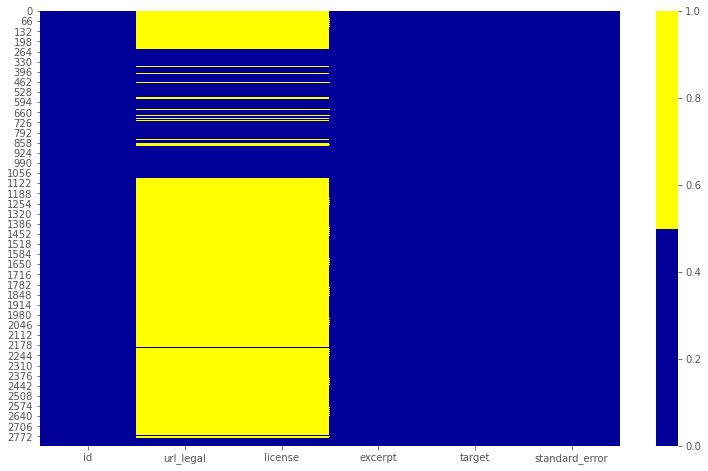

In [32]:
plot_msv_heatmap(directory ='../Datasets/CR/', filename='train.csv') # yellow -> missing values

In [33]:
def load_data (dataset_dir, file_name, log=False) -> object:
    working_dir = os.getcwd()
    dataset = os.path.join(working_dir,dataset_dir,file_name)
    if os.path.exists(dataset):
        raw_data = pd.read_csv(dataset)
        if(log  == True):
            print(type(raw_data))
            print(working_dir)
            print(dataset)
            print(raw_data.head())
        return raw_data
    else:
        print("Error dataset does not exist on specified path")

In [34]:
data = load_data(dataset_dir='CR', file_name='train.csv', log=True)

<class 'pandas.core.frame.DataFrame'>
d:\Projects\CommonRedability
d:\Projects\CommonRedability\CR\train.csv
          id url_legal license  \
0  c12129c31       NaN     NaN   
1  85aa80a4c       NaN     NaN   
2  b69ac6792       NaN     NaN   
3  dd1000b26       NaN     NaN   
4  37c1b32fb       NaN     NaN   

                                             excerpt    target  standard_error  
0  When the young people returned to the ballroom... -0.340259        0.464009  
1  All through dinner time, Mrs. Fayre was somewh... -0.315372        0.480805  
2  As Roger had predicted, the snow departed as q... -0.580118        0.476676  
3  And outside before the palace a great garden w... -1.054013        0.450007  
4  Once upon a time there were Three Bears who li...  0.247197        0.510845  


In [36]:
def generate_data (raw_data : object) -> object:
    new_data = raw_data.drop(['url_legal', 'license'], axis=1)
    new_data.replace({'excerpt' : '\W+'}, {'excerpt': ' '}, regex=True)
    return new_data

In [37]:
new_data = generate_data(data)
new_data.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [38]:
import dataloader #load the module

In [39]:
ld = dataloader.loadData('CR', 'train.csv') # instantiate

In [42]:
cdf = ld.load_data('CR','train.csv') # call

file train.csv found in given directory


In [43]:
cdf.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,All through dinner time Mrs Fayre was somewhat...,-0.315372,0.480805
2,b69ac6792,As Roger had predicted the snow departed as qu...,-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845
